# Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
import traceback

# Tensor

## Defining Tensor

Tensor is kind of matrix, and if we have a matrix like

$$\mathbf{x}=\left(\begin{matrix}1\\1\end{matrix}\right)\tag{1}$$

We can make tensor of (1) directly using tf.constant() method like

In [3]:
x = tf.constant([[1.],[1.]])
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

Since elements of (1) are only 1, we can use tf.ones() instead of typing all elements like

In [4]:
x = tf.ones(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

We can make another type of tensor using tf.Variable method

In [5]:
x = tf.Variable([[1.], [1.]])
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [1.]], dtype=float32)>

Also, we can make tensor with 0 like tf.ones() as

In [6]:
x = tf.zeros(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

And we can make tensor with random values from noraml distribution using

In [7]:
x = tf.random.normal(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.6906469 ],
       [-0.50573057]], dtype=float32)>

In [8]:
x = tf.random.uniform(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.28990865],
       [0.6018853 ]], dtype=float32)>

Also we can make tensor with random values from uniform distribution using

## Modifying Tensor

All 3 method of defining tensor can make tensor similar to (1), but there is different between those methods. Before that, we can change tensor's value using .assign() method

In [9]:
x = tf.Variable([[1.], [1.]])
x.assign(tf.Variable([[2.], [2.]]))
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.],
       [2.]], dtype=float32)>

We can change only 1 values from tensor as

In [10]:
x[0, 0].assign(1.)
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Also, we can add tensor to tensor using

In [11]:
y = tf.ones((2, 1))
x.assign_add(y)
x

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[2.],
       [3.]], dtype=float32)>

However, only tensor made by tf.Variable() can be modified. Tensor made by .constant(), .ones() can't be modified.

If we try to modify the tensor made by .constant() or ones(), error occurs.

In [12]:
x = tf.constant([[1.],[1.]])

try:
    x.assign(tf.Variable([[2.], [2.]]))
except Exception as e:
    traceback.print_exc()

Traceback (most recent call last):
  File "C:\Users\Jeongho Seo\AppData\Local\Temp\ipykernel_24204\2212837504.py", line 4, in <module>
    x.assign(tf.Variable([[2.], [2.]]))
    ^^^^^^^^
  File "C:\Users\Jeongho Seo\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\framework\tensor.py", line 260, in __getattr__
    self.__getattribute__(name)
AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'


## Generating Modifiable Tensor

If want to make tensor with random values from normal distribution, but can be modified, we can make tensor like

In [13]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.7894105 ],
       [-0.23143442],
       [ 0.30397826]], dtype=float32)>

## Mathematical Operations

Let's assume there are $2$ $2\times 2$ 2-dimensional matrices $\mathbf{A}, \mathbf{B}$ as

$$\mathbf{A}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)\tag{2}$$
$$\mathbf{B}=\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)\tag{3}$$

We can make tensor of (2), (3) as

In [14]:
a = tf.Variable([[1., 4], [9., 0]])
b = tf.Variable([[5., 0], [2., -1]])
a

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 4.],
       [9., 0.]], dtype=float32)>

When we have 2 same shape of matrix, we can conduct matrix addition like

$$\mathbf{A}+\mathbf{B}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)+\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}6&4\\11&-1\end{matrix}\right)\tag{4}$$

We can conduct matrix addition (4) using tensor as

In [15]:
a + b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 6.,  4.],
       [11., -1.]], dtype=float32)>

Also, we can conduct matrix subtraction like

$$\mathbf{A}-\mathbf{B}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)+(-1)\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)+\left(\begin{matrix}-5&0\\-2&1\end{matrix}\right)=\left(\begin{matrix}-4&4\\7&1\end{matrix}\right)\tag{5}$$

We can conduct matrix subtraction (5) using tensor as

In [16]:
a - b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-4.,  4.],
       [ 7.,  1.]], dtype=float32)>

We can get Hadamard power(element-wise power) on matrix like

$$\mathbf{A}^{\circ2}=\mathbf{A}\circ\mathbf{A}=\left(\begin{matrix}1^2&4^2\\9^2&0^2\end{matrix}\right)=\left(\begin{matrix}1&16\\81&0\end{matrix}\right)\tag{6}$$

We can conduct Hadamard power (6) using tensor as

In [17]:
tf.square(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1., 16.],
       [81.,  0.]], dtype=float32)>

Or simply like

In [18]:
a ** 2

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 1., 16.],
       [81.,  0.]], dtype=float32)>

We can get Hadamard square root(element-wise square root) on matrix like

$$\sqrt{\mathbf{A}}^\circ=\left(\begin{matrix}\sqrt{1}&\sqrt{4}\\\sqrt{9}&\sqrt{0}\end{matrix}\right)=\left(\begin{matrix}1&2\\3&0\end{matrix}\right)\tag{7}$$

We can conduct Hadamard square root (7) using tensor as

In [19]:
tf.sqrt(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 2.],
       [3., 0.]], dtype=float32)>

We can conduct ordinary matrix multiplication like

$$\mathbf{AB}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}1\times5+4\times2&1\times0+4\times(-1)\\9\times5+0\times2&9\times0+0\times(-1)\end{matrix}\right)=\left(\begin{matrix}13&-4\\45&0\end{matrix}\right)\tag{8}$$

We can conduct matrix multiplication (8) using tensor as

In [20]:
tf.matmul(a, b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[13., -4.],
       [45.,  0.]], dtype=float32)>

We can conduct Hadamard product(element-wise matrix multiplication) like

$$\mathbf{A}\circ\mathbf{B}=\left(\begin{matrix}1&4\\9&0\end{matrix}\right)\circ\left(\begin{matrix}5&0\\2&-1\end{matrix}\right)=\left(\begin{matrix}1\times5&4\times0\\9\times2&0\times(-1)\end{matrix}\right)=\left(\begin{matrix}5&0\\18&0\end{matrix}\right)\tag{9}$$

We can conduct Hadamard product using tensor as

In [21]:
a * b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 5.,  0.],
       [18., -0.]], dtype=float32)>

# Classification

For classification, generate 2 classes with 1,000 random points. 2 classes have different mean but same covariance, 2 classes can be classified well.

When we define data with 2 classes(negative, positive), make 2 $1,000\times2$ 2-dimensional matrices with $x$ and $y$ as

$$\mathbf{P} _n=\left(\begin{matrix}x_{n11}&y_{n12}\\x_{n21}&y_{n22}\\\vdots&\vdots\\x_{n10001}&y_{n10002}\\\end{matrix}\right)\tag{10}$$
$$\mathbf{P} _p=\left(\begin{matrix}x_{p11}&y_{p12}\\x_{p21}&y_{p22}\\\vdots&\vdots\\x_{p10001}&y_{p10002}\\\end{matrix}\right)\tag{11}$$

In [22]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

Concatenate (10), (11) vertically as

$$\mathbf{P}=\left(\begin{matrix}\mathbf{P} _n\\\mathbf{P} _p\\\end{matrix}\right)=\left(\begin{matrix}x_{n11}&y_{n12}\\x_{n21}&y_{n22}\\\vdots&\vdots\\x_{n10001}&y_{n10002}\\x_{p11}&y_{p12}\\x_{p21}&y_{p22}\\\vdots&\vdots\\x_{p10001}&y_{p10002}\\\end{matrix}\right)\tag{12}$$

In [23]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

And we made target values for 2 classes like

$$\mathbf{z} _n=\left(\begin{matrix}0\\0\\\vdots\\0\\\end{matrix}\right)\tag{13}$$
$$\mathbf{z} _p=\left(\begin{matrix}1\\1\\\vdots\\1\\\end{matrix}\right)\tag{14}$$

Same as (12), concatenate (13), (14) vertically as

$$\mathbf{z}=\left(\begin{matrix}\mathbf{z}_n\\\mathbf{z}_p\\\end{matrix}\right)=\left(\begin{matrix}0\\0\\\vdots\\0\\1\\1\\\vdots\\1\\\end{matrix}\right)\tag{15}$$

In [24]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

Finally, concatenate (12), (15) horizontally as

$$\left(\begin{matrix}\mathbf{P}&\mathbf{z}\\\end{matrix}\right)=\left(\begin{matrix}\left(\begin{matrix}\mathbf{P} _n\\\mathbf{P} _p\\\end{matrix}\right)&\left(\begin{matrix}\mathbf{z}_n\\\mathbf{z}_p\\\end{matrix}\right)\\\end{matrix}\right)=\left(\begin{matrix}x_{n11}&x_{n12}&z_{n1}\\x_{n21}&x_{n22}&z_{n2}\\\vdots&\vdots&\vdots\\x_{n10001}&x_{n10002}&z_{n1000}\\x_{p11}&x_{p12}&z_{p1}\\x_{p21}&x_{p22}&z_{p2}\\\vdots&\vdots&\vdots\\x_{p10001}&x_{p10002}&z_{p1000}\\\end{matrix}\right)=\left(\begin{matrix}x_{n11}&x_{n12}&0\\x_{n21}&x_{n22}&0\\\vdots&\vdots&\vdots\\x_{n10001}&x_{n10002}&0\\x_{p11}&x_{p12}&1\\x_{p21}&x_{p22}&1\\\vdots&\vdots&\vdots\\x_{p10001}&x_{p10002}&1\\\end{matrix}\right)\tag{16}$$

With those data, we can plot data on 3-dimensional space like

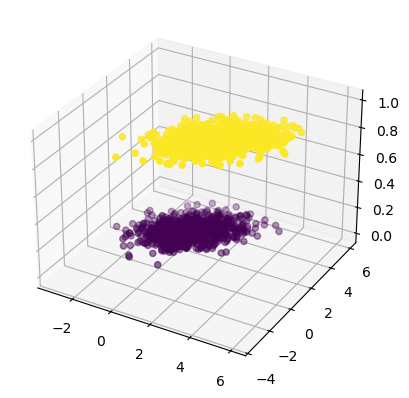

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(inputs[:, 0], inputs[:, 1], targets[:, 0], c=targets[:, 0])
plt.show()

We can also plot without $z$, simply 2-dimensional space

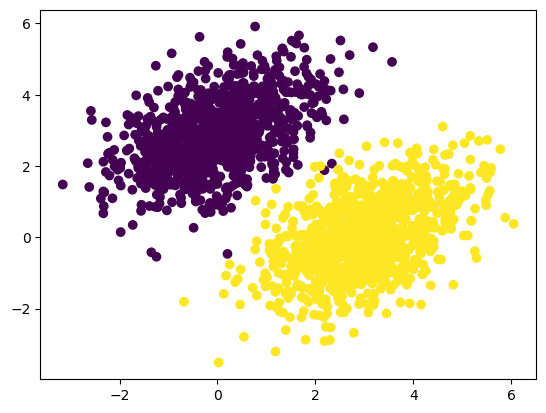

In [26]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

Our goal is to find optimal 

$$\mathbf{x}=\left(\begin{matrix}x_{11}\\x_{21}\\\end{matrix}\right)\tag{17}$$

In [28]:
input_dim = 2

$$y=y_{11}\tag{18}$$

In [29]:
output_dim = 1

$$\mathbf{w}=\left(\begin{matrix}w_{11}\\w_{21}\\\end{matrix}\right)\tag{19}$$

In [30]:
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))

$$b=b_{11}\tag{20}$$

In [34]:
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

$$y=\mathbf{x}^T\mathbf{w}+b\tag{21}$$

$$y=\mathbf{x}^T\mathbf{w}+b=\left(\begin{matrix}x_{11}&x_{21}\\\end{matrix}\right)\left(\begin{matrix}w_{11}\\w_{21}\\\end{matrix}\right)+b_{11}=x_{11}w_{11}+x_{21}w_{21}+b_{11}\tag{22}$$

In [32]:
def model(inputs):
    return tf.matmul(inputs, W) + b

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y} _i)^2\tag{23}$$

In [33]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

<hr style="width: 100%; margin-left: 0; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Algorithm</strong> training_step(inputs, targets)
<hr style="width: 100%; margin-left: 0; margin-top: 0px; margin-bottom: 0px; border: 0.5px solid black;">
<strong>Input</strong> input data $x$ target labels $y$, learning rate scalar $\eta$, model parameter $\mathbf{w}$, $b$<br>
<strong>Start gradient recording</strong><br>
&emsp; $\hat{y}$ ← model(x)<br>
&emsp; $e$ ← model(x)<br>
&emsp; $J(\mathbf{w})$ ← mean(square($e$))<br>
<strong>Compute gradients</strong><br>
&emsp; $\nabla \mathbf{w}$ ← $\frac{\partial J(\mathbf{w})}{\partial\mathbf{w}}$<br>
&emsp; $\nabla b$ ← $\frac{\partial J(\mathbf{w})}{\partial b}$<br>
<strong>Update parameter</strong><br>
&emsp; $\mathbf{w}$ ← $\eta\nabla W$<br>
&emsp; $b$ ← $\eta\nabla b$<br>
<strong>Output</strong> $J(\mathbf{w})$
<hr style="width: 100%; margin-left: 0; margin-top: 0px; border: 0.5px solid black;">

In [35]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

Conducted a total of 40 iterations, loss continuously decreased

In [36]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.6072
Loss at step 1: 0.3069
Loss at step 2: 0.1386
Loss at step 3: 0.1152
Loss at step 4: 0.1062
Loss at step 5: 0.0991
Loss at step 6: 0.0927
Loss at step 7: 0.0869
Loss at step 8: 0.0816
Loss at step 9: 0.0767
Loss at step 10: 0.0724
Loss at step 11: 0.0683
Loss at step 12: 0.0647
Loss at step 13: 0.0614
Loss at step 14: 0.0583
Loss at step 15: 0.0556
Loss at step 16: 0.0531
Loss at step 17: 0.0508
Loss at step 18: 0.0487
Loss at step 19: 0.0468
Loss at step 20: 0.0451
Loss at step 21: 0.0435
Loss at step 22: 0.0420
Loss at step 23: 0.0407
Loss at step 24: 0.0395
Loss at step 25: 0.0385
Loss at step 26: 0.0375
Loss at step 27: 0.0366
Loss at step 28: 0.0357
Loss at step 29: 0.0350
Loss at step 30: 0.0343
Loss at step 31: 0.0337
Loss at step 32: 0.0331
Loss at step 33: 0.0326
Loss at step 34: 0.0321
Loss at step 35: 0.0317
Loss at step 36: 0.0313
Loss at step 37: 0.0309
Loss at step 38: 0.0306
Loss at step 39: 0.0303


Get predicted value using fitted model

In [ ]:
predictions = model(inputs)

Draw scattered plot using predicted value, if $\hat{y}<0.5$, purple, if $\hat{y}\geq 0.5$, yellow

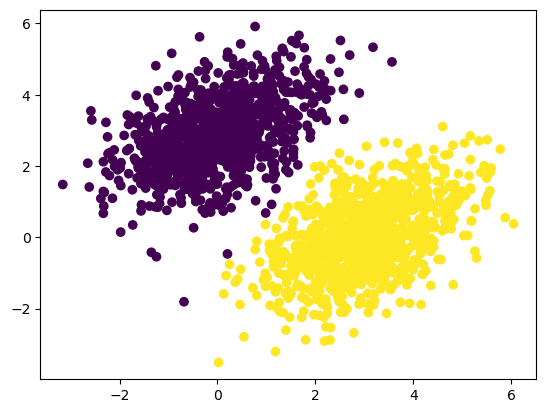

In [37]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

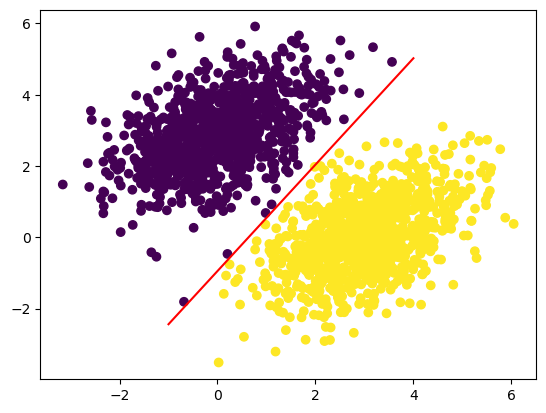

In [38]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)